In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from pylab import exp
from scipy import optimize
from math import sqrt
import glob
import seaborn as sns
import h5py   
from matplotlib.colors import LogNorm, Normalize
from scipy.signal import find_peaks
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from random import randint
from pynverse import inversefunc

In [2]:
a=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/cal_text_mpw2/tot/*")
a= sorted(a)
colors = []

for i in range(64):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


In [3]:
alldata=[]

for z in range(len(a)):
    data11=[]
    data=np.genfromtxt(a[z],delimiter='\t',dtype=str,autostrip=True)
    for i in range(len(data)):
        temp=[]
        tempdata= data[i][1:-1].split()
        tempdata= np.char.strip(tempdata)
        for j in range(len(tempdata)):
            tempdata[j]=tempdata[j].replace(",","")
        for k in range(len(tempdata)):
            temp.append(float(tempdata[k]))
        data11.append(temp)
    alldata.append(data11)

alltot=[]
allstd=[]
for i in range(len(alldata)):
    temp=[]
    temp1=[]
    for j in range(len(alldata[i])):
        temp1.append(np.mean(alldata[i][j]))
        temp.append(np.std(alldata[i][j]))
    alltot.append(temp1)
    allstd.append(temp)

In [4]:
v=np.array([0.43,0.59,0.79,0.99,1.19,1.39,1.59,1.79])

pixels=[]
pixelstd=[]
for i in range(len(alldata[0])):
    temp=[]
    temp2=[]
    for j in range(len(alltot)):
        temp.append(alltot[j][i])
        temp2.append(allstd[j][i])
    pixels.append(temp)
    pixelstd.append(temp2)
    temp2=[]
    temp=[]

electrons=[]
c=6.24*10**18
cont=(2.8*10**-15)*c
for i in range(len(v)):
    d=v[i]*cont
    electrons.append(d)

yerr=[]
for i in range(len(allstd[0])):
    temp=[]
    for j in range(len(allstd)):
        temp.append(allstd[j][i])
    yerr.append(temp)
    temp=[]

In [5]:
z=5

ms=[]
bs=[]
for i in range(len(pixels)):
    m,b = np.polyfit(electrons[0:z],pixels[i][0:z],1)
    ms.append(m)
    bs.append(b)

electrons= np.asarray(electrons)

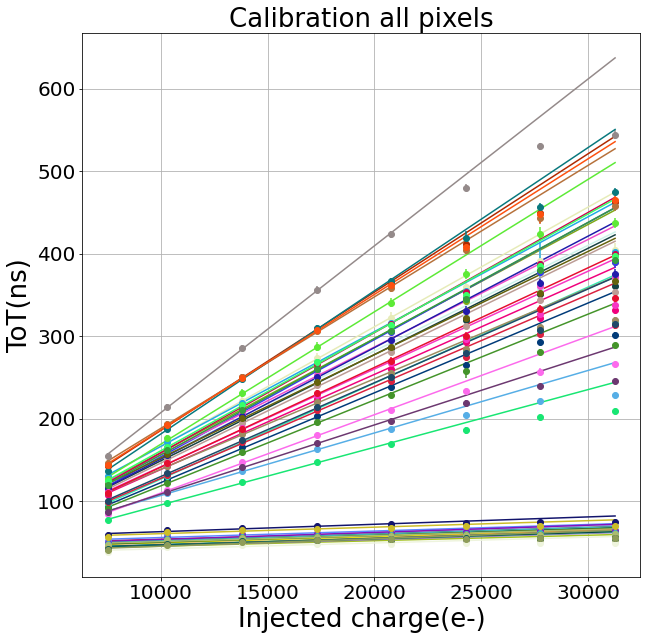

In [6]:
fig = plt.figure(figsize=(10,10))

for i in range(len(ms)):
    plt.plot(electrons, (electrons*ms[i]+bs[i])*10**9,color=colors[i])
    plt.errorbar(electrons,np.asarray(pixels[i])*10**9, yerr= np.asarray(yerr[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration all pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

# Cont pixels

# reset pixels

In [7]:
reset=[]
i=4
while i < 65:
    reset.append(pixels[i])
    i=i+8

i=5

while i < 65:
    reset.append(pixels[i])
    i=i+8

i=6
    
while i < 65:
    reset.append(pixels[i])
    i=i+8

i=7
 
while i < 65:
    reset.append(pixels[i])
    i=i+8

In [8]:
def func3(x,a,b,c,d):
    return a*x + b + c/(x-d)


In [9]:
yerr2=[]

i=4
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=5

while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=6
    
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

i=7
 
while i < 65:
    yerr2.append(yerr[i])
    i=i+8

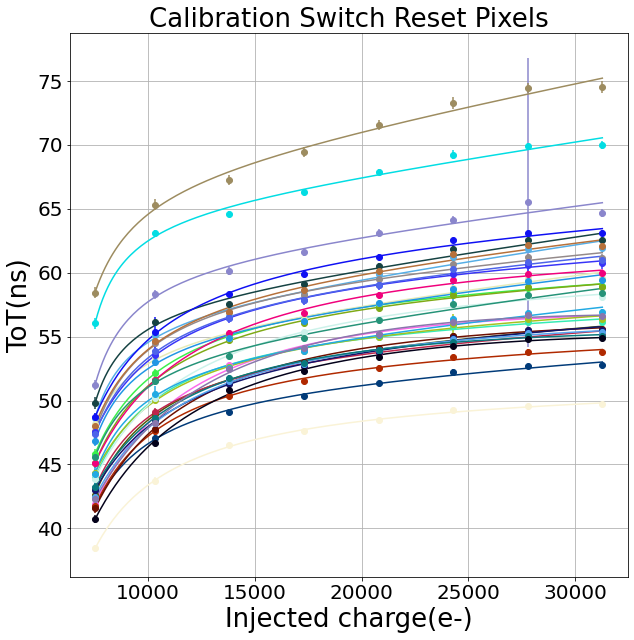

In [10]:
fig = plt.figure(figsize=(10,10))

poptz=[]

for i in range(len(reset)):
    x=electrons
    y=np.asarray(reset[i])*10**9
    x2=np.linspace(electrons[0],electrons[-1],200)
    popt, pcov = curve_fit(func3, x, y)
    poptz.append(popt)
    plt.plot(x2, func3(x2,popt[0],popt[1],popt[2],popt[3]),color=colors[i])
    plt.errorbar(electrons,np.asarray(reset[i])*10**9, yerr= np.asarray(yerr2[i])*10**9,fmt='o', color=colors[i])
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("Calibration Switch Reset Pixels",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [11]:
len(poptz)

32

In [12]:
msmap=np.reshape(ms,(8,8))

msmap= msmap[0:8,0:4]

In [13]:
mapz= np.reshape(np.arange(0,64,1),(8,8))

mapz= mapz[0:8,0:4]

<Figure size 720x720 with 0 Axes>

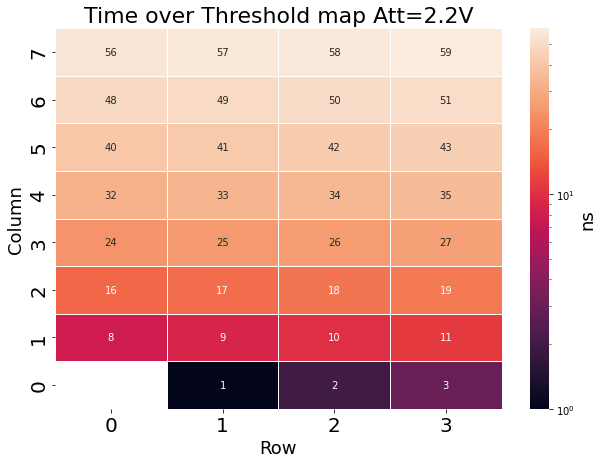

In [14]:
fig = plt.figure(figsize=(10,10))

plt.figure(figsize = (10,7))
plt.title('Time over Threshold map Att=2.2V',fontsize=22)
ax=sns.heatmap(mapz, linewidth=0.5,norm=LogNorm(),annot=True, fmt='.3g')
ax.collections[0].colorbar.set_label("ns",fontsize=18)
plt.xlabel("Row",fontsize=18)
plt.ylabel('Column',fontsize=18)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
fig.patch.set_facecolor('xkcd:white')
sns.set_theme(style='white')
ax.invert_yaxis()
plt.show()

In [15]:
b=glob.glob("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/lascan/tot/*")
b= sorted(b)

In [16]:
len(b)

6

In [17]:
alldata2=[]

for z in range(len(b)-1):
    data11=[]
    data=np.genfromtxt(b[z],delimiter='\t',dtype=str,autostrip=True)
    for i in range(len(data)):
        temp=[]
        tempdata= data[i][1:-1].split()
        tempdata= np.char.strip(tempdata)
        for j in range(len(tempdata)):
            tempdata[j]=tempdata[j].replace(",","")
        for k in range(len(tempdata)):
            temp.append(float(tempdata[k]))
        data11.append(temp)
    alldata2.append(data11)


In [18]:
np.mean(alldata[0][2])

8.468279035311085e-08

In [19]:
allcharges=[]
alltot=[]
for i in range(64):
    temp1=[]
    temp2=[]
    for j in range(5):
        for d in (range(len(alldata2[j][i]))):
            temp1.append(alldata2[j][i][d]*10**9)
            tt= (alldata2[j][i][d]-bs[i])/ms[i]
            temp2.append(tt)
    allcharges.append(temp2)
    alltot.append(temp1)


In [20]:
conttot=[]
concharges=[]
i=0

while i < 60:
    conttot.append(alltot[i])
    concharges.append(allcharges[i])
    i=i+8

i=1

while i < 65:
    conttot.append(alltot[i])
    concharges.append(allcharges[i])
    i=i+8

i=2
    
while i < 65:
    conttot.append(alltot[i])
    concharges.append(allcharges[i])
    i=i+8

i=3
 
while i < 65:
    conttot.append(alltot[i])
    concharges.append(allcharges[i])
    i=i+8

In [21]:
resettot=[]
i=4
while i < 65:
    resettot.append(alltot[i])
    i=i+8

i=5

while i < 65:
    resettot.append(alltot[i])
    i=i+8

i=6
    
while i < 65:
    resettot.append(alltot[i])
    i=i+8

i=7
 
while i < 65:
    resettot.append(alltot[i])
    i=i+8

In [22]:
len(alltot[0])

1010

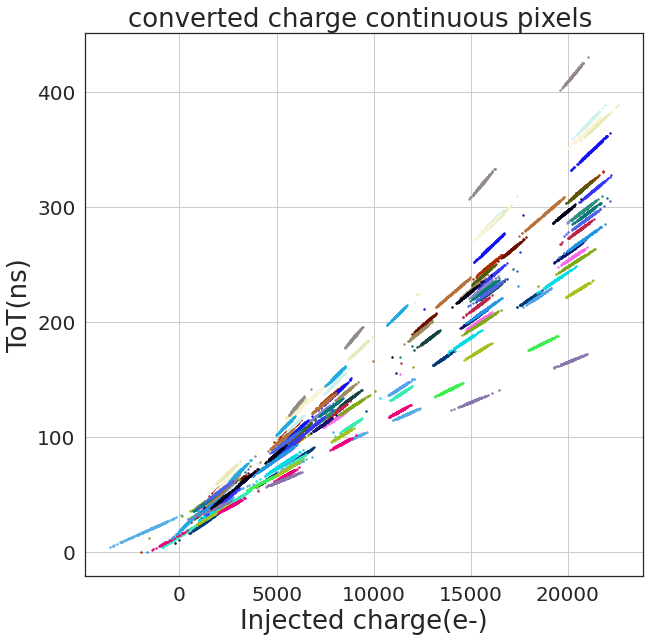

In [23]:
fig = plt.figure(figsize=(10,10))

for i in range(len(conttot)):
    plt.scatter(concharges[i], conttot[i],color=colors[i],s=2)
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("converted charge continuous pixels ",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()

In [24]:
def conv(tot, a, b, c, d):
    return ((a*d)+tot-b + np.sqrt((b+a*d-tot)**2+4*a*d))/(2*a)

In [25]:
poptz[0]

array([ 2.32487514e-04,  5.58178672e+01, -1.49106197e+04,  5.84099822e+03])

In [26]:
resetcharges=[]

for i in range(len(resettot)):
    temp1=[]
    temp2=[]
    for j in range(len(resettot[i])):
        chargez= conv(resettot[i][j],poptz[i][0],poptz[i][1],poptz[i][2],poptz[i][3])
        temp2.append(chargez)
    resetcharges.append(temp2)


In [27]:
len(resettot[0])

1026

In [28]:
resettot[0][0]

51.4375

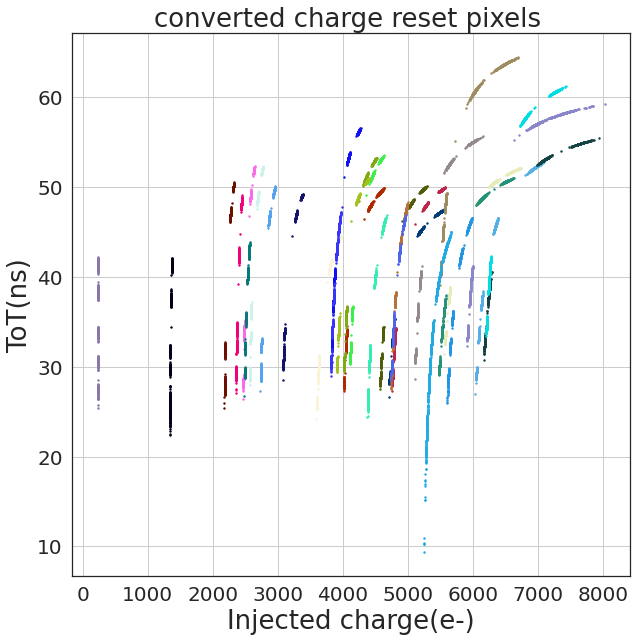

In [29]:
fig = plt.figure(figsize=(10,10))

for i in range(len(resetcharges)):
    plt.scatter(resetcharges[i], resettot[i],color=colors[i],s=2)
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("Injected charge(e-)",fontsize=26)
plt.title("converted charge reset pixels ",fontsize=26)
plt.ylabel("ToT(ns)",fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()
plt.show()